<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/HANY/feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Feature Engineering


---


| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | :-------------: |
| ALYA BALQISS BINTI AZAHAR   |  A21EC0158     | Assignment 4 |
| MUHAMMAD HARITH HAKIM BIN OTHMAN              | A21EC0205     | Assignment 4|
| LIEW YVONNE            |A21EC0045      | Assignment 3 |
|NADIA SYAFIQAH BINTI ZULKIPLI  | A21EC0098      | Assignment 3 |

---

# 1. Introduction
Feature engineering is a crucial step in the data preprocessing pipeline that involves creating new features or modifying existing ones to enhance the performance of machine learning models.

This undertaking involves an exploration of feature engineering methods customised for the hourly climate data from Brazil. This dataset commonly comprises variables such as temperature, humidity, wind speed, precipitation, and other meteorological parameters documented regularly. The objective is to extract informative features that represent the intricate dynamics of weather conditions in Brazil.


---




# 2. Loading Dataset

### Import Libraries

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harithothman","key":"442ee180c116da9cbd795d2375212eae"}'}

- **'google.colab import files'** - imports the necessary function to upload files in Colab.

- **'files.upload()'** - initiates a file upload dialog box, enabling users to choose and upload files directly into the Colab notebook.

After running the cell with the code above, it will prompt the user to upload files. Navigate to the intended file(s) for upload, select them, and click "Open".

The uploaded files will be stored in the uploaded dictionary, where the keys are the file names and the values are the file contents. Further process or  actions can be performed with these files as needed within the Colab notebook.

## Uploading Dataset using Kaggle API
 The process involves setting up Kaggle credentials on Google Colab to enable interaction with the Kaggle API for dataset downloads.  This process enables users to access datasets without the need to download them manually, particularly beneficial for handling large datasets.


In [ ]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ # 3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json # 4. Set File Permission

**Download the dataset**

In [ ]:
!kaggle datasets download PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

100% 1.57G/1.58G [00:15<00:00, 94.5MB/s]
100% 1.58G/1.58G [00:15<00:00, 107MB/s] 


This command uses the Kaggle API to download the dataset named **hourly-weather-surface-brazil-southeast-region**.

**Unzip the downloaded dataset**

In [ ]:
! unzip hourly-weather-surface-brazil-southeast-region.zip

Archive:  hourly-weather-surface-brazil-southeast-region.zip
  inflating: central_west.csv        
  inflating: columns_description.csv  
  inflating: make_dataset.py         
  inflating: metrics.py              
  inflating: north.csv               
  inflating: northeast.csv           
  inflating: south.csv               
  inflating: southeast.csv           
  inflating: stations.csv            


After downloading, this command unzips the dataset file, making its contents accessible for further use.

### Import Pandas Libraries and Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('central_west.csv')

This code reads the CSV file named central_west.csv (assuming it is one of the files within the unzipped dataset) into a Pandas DataFrame named df.

## Data Summary
Display the first few rows of a DataFrame using df.head(). This is helpful for quickly examining the structure and content of the dataset. By default, it shows the first 5 rows of the DataFrame.

In [ ]:
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391,26.5,17.7,...,39,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306,26.6,16.7,...,55,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167,27.3,15.8,...,62,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279,27.5,12.9,...,43,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753,27.5,13.7,...,98,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11427120 entries, 0 to 11427119
Data columns (total 27 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   index                                                  int64  
 1   Data                                                   object 
 2   Hora                                                   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       float64
 7   RADIACAO GLOBAL (Kj/m²)                                int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           float64
 9   TEMPERATURA DO PONTO DE ORVALHO (°C)                   float64
 10  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             float64
 

The **df.info()** function provides a concise summary of the DataFrame's information. It includes details such as the column names, data types, non-null counts, and memory usage. This function helps in understanding the dataset's structure, identifying missing values, and assessing the types of data stored in each column.


---

# Data Preprocessing

## Import Necessary Libraries
Import pandas, numpy, matplotlib, seaborn, and random libraries for data manipulation, visualization, and random sampling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Data Chunking and Concatenation
- The code reads a large CSV file ("central_west.csv") in chunks to manage memory efficiently.
- It selects a random sample of approximately 10% of the total rows, skips the remaining rows, reads the data in smaller portions (chunks), and concatenates these chunks into a single pandas DataFrame (df).

In [ ]:
filename = r"central_west.csv"
n = sum(1 for line in open(filename)) - 1
chunk_size = 1000000  # Adjust the chunk size as needed

# Sample size of 10%
s = n // 10
skip = sorted(random.sample(range(1, n + 1), n - s))

chunks = []
for chunk in pd.read_csv(filename, chunksize=chunk_size, skiprows=skip):
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

This approach is helpful when dealing with large datasets that might not fit into memory entirely, allowing for processing manageable chunks of data at a time.

## Drop Duplicate Rows
This definition removes duplicate rows within the DataFrame.

In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

Call the function to execute the process of removing duplicate rows.

In [ ]:
drop_duplicates(df)

No duplicate rows were found.


## Renaming the Columns
Before proceeding with additional data preprocessing steps, it is seen that the dataset chosen **(Climate Weather Surface of Brazil - Hourly)** has several columns in the Portugese language.

It is necessary to translate the dataset from Portuguese to English based on the information available on Kaggle. This translation provides a more comprehensive understanding of the dataset's contents.

In [ ]:
# Mapping the Portugese column names to their English equivalents
translation_dict = {
    'Data': 'Date',
    'Hora': 'Time',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Amount of Precipitation (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Atmospheric Pressure at Station Level (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'MAX Air pressure for the last hour (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'MIN Air pressure for the last hour (mB)',
    'RADIACAO GLOBAL (Kj/m²)': 'Solar Radiation (KJ/m2)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Air Temperature (instant) (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Dew Point Temperature (instant) (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'MAX Temperature for the last hour (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'MIN Temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'MAX Dew Point Temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'MIN Dew Point Temperature for the last hour (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'MAX Relative Humid Temperature for the last hour (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'MIN Relative Humid Temperature for the last hour (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Relative Humid (instant) (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Wind Direction (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)': 'Wind Gust (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Wind Speed (m/s)'
}

# Renaming columns in the DataFrame
df.rename(columns=translation_dict, inplace=True)

To see the changes, display the dataset using df.columns.

In [ ]:
df.columns

Index(['index', 'Date', 'Time', 'Amount of Precipitation (mm)',
       'Atmospheric Pressure at Station Level (mB)',
       'MAX Air pressure for the last hour (mB)',
       'MIN Air pressure for the last hour (mB)', 'Solar Radiation (KJ/m2)',
       'Air Temperature (instant) (°C)',
       'Dew Point Temperature (instant) (°C)',
       'MAX Temperature for the last hour (°C)',
       'MIN Temperature for the last hour (°C)',
       'MAX Dew Point Temperature for the last hour (°C)',
       'MIN Dew Point Temperature for the last hour (°C)',
       'MAX Relative Humid Temperature for the last hour (%)',
       'MIN Relative Humid Temperature for the last hour (%)',
       'Relative Humid (instant) (%)', 'Wind Direction (gr) (° (gr))',
       'Wind Gust (m/s)', 'Wind Speed (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

## Convert Data Types

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Hour' column to datetime format
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Display the updated data types of 'Date' and 'Hour' columns
print("Updated Data Types:")
print(df.dtypes)


Updated Data Types:
index                                                            int64
Date                                                    datetime64[ns]
Time                                                            object
Amount of Precipitation (mm)                                   float64
Atmospheric Pressure at Station Level (mB)                     float64
MAX Air pressure for the last hour (mB)                        float64
MIN Air pressure for the last hour (mB)                        float64
Solar Radiation (KJ/m2)                                          int64
Air Temperature (instant) (°C)                                 float64
Dew Point Temperature (instant) (°C)                           float64
MAX Temperature for the last hour (°C)                         float64
MIN Temperature for the last hour (°C)                         float64
MAX Dew Point Temperature for the last hour (°C)               float64
MIN Dew Point Temperature for the last hour (°C)         

- Converting 'Date' and 'Time' columns to datetime format ensures uniformity in data representation. It prevents inconsistencies that might arise from different formats or interpretations of dates and times.

- Datetime objects also allow for easy extraction of components like day, month, year, hour, minute, etc. This makes it simpler to perform time-based operations, filtering, grouping, and aggregating data based on temporal criteria.

## Handling Missing Data

In [ ]:
# Handle missing values
df.dropna(inplace=True)

This step ensures that any rows containing NaN (missing) values across any column are removed from the DataFrame. It helps in cleaning the data by eliminating rows with incomplete information.

## Replacing Negative Values
Given that the dataset contains negative values of 9999 (-9999) within specific columns related to weather parameters, it's imperative to replace these negative values with zeros.

This decision stems from the understanding that certain weather-related measurements, such as temperature, humidity, or atmospheric pressure, should not logically have such negative values within the context of this dataset.

In [ ]:
# Replace all occurrences of negative values with 0 in the entire DataFrame
df.replace(-9999, 0, inplace=True)

- This code snippet replaces all instances of -9999 with 0 throughout the DataFrame, effectively transforming negative placeholder values to zeros.

- The negative values in these columns might signify missing data, erroneous entries, or placeholders that were inaccurately represented as negative values.

## Specify File Path (Cleaned Dataset)
- Specify the file path for the original dataset and the cleaned dataset.
- Read the cleaned dataset ("central_west.csv") into a DataFrame (df)

In [ ]:
cleaned_file_dataset = r"central_west.csv"
df.to_csv(cleaned_file_dataset, index=False)

This overwrites the existing file "central_west.csv" with the content of the DataFrame df, replacing the original file with the cleaned version of the data.

## Chunking and Processing the Cleaned Data
- Determine the chunk size (number of rows) for processing the dataset in manageable portions.
- Iterate through the cleaned dataset using with chunksize to read data in smaller chunks.
- Process each chunk individually (print shape, perform operations, etc.).

In [ ]:
cleaned_file_dataset = r"central_west.csv"

# Chunk size
chunk_size = 100000  # Adjust this value based on your preferences

# Read the CSV file in chunks
for i, chunk in enumerate(pd.read_csv(cleaned_file_dataset, chunksize=chunk_size)):
    # Process each chunk as needed
    # For example, you can print the shape of each chunk
    print(f"Chunk {i+1} Shape: {chunk.shape}")

    # Save the chunk to a separate CSV file
    chunk.to_csv(f"{cleaned_file_dataset}_chunk_{i+1}.csv", index=False)

Chunk 1 Shape: (100000, 28)
Chunk 2 Shape: (100000, 28)
Chunk 3 Shape: (100000, 28)
Chunk 4 Shape: (100000, 28)
Chunk 5 Shape: (100000, 28)
Chunk 6 Shape: (100000, 28)
Chunk 7 Shape: (100000, 28)
Chunk 8 Shape: (100000, 28)
Chunk 9 Shape: (100000, 28)
Chunk 10 Shape: (100000, 28)
Chunk 11 Shape: (100000, 28)
Chunk 12 Shape: (42712, 28)


The code reads a large CSV file in manageable chunks based on the specified chunk size (100000).
It then processes each chunk and saves each chunk as a separate CSV file, appending an index-based suffix to the cleaned dataset, to facilitate handling and analysis of large datasets in smaller, more manageable portions.

### Chunk Information
 Generate the information of each chunk using the **info()** method which includes details such as column names, non-null counts, and data types to get insights on the chunk.

In [ ]:
# Information about the chunk
chunk_info = f"Chunk {i+1} Info:\n{chunk.info()}\n"

# Print or log the chunk information
print(chunk_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42712 entries, 1100000 to 1142711
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   index                                                 42712 non-null  int64  
 1   Date                                                  42712 non-null  object 
 2   Time                                                  42712 non-null  object 
 3   Amount of Precipitation (mm)                          42712 non-null  float64
 4   Atmospheric Pressure at Station Level (mB)            42712 non-null  float64
 5   MAX Air pressure for the last hour (mB)               42712 non-null  float64
 6   MIN Air pressure for the last hour (mB)               42712 non-null  float64
 7   Solar Radiation (KJ/m2)                               42712 non-null  int64  
 8   Air Temperature (instant) (°C)                  

Generate descriptive statistics of the numerical columns using **df.describe()**.

The output includes various statistical measures such as count, mean, standard deviation, minimum, maximum, and quartile information.

In [ ]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,index,Amount of Precipitation (mm),Atmospheric Pressure at Station Level (mB),MAX Air pressure for the last hour (mB),MIN Air pressure for the last hour (mB),Solar Radiation (KJ/m2),Air Temperature (instant) (°C),Dew Point Temperature (instant) (°C),MAX Temperature for the last hour (°C),MIN Temperature for the last hour (°C),...,MIN Dew Point Temperature for the last hour (°C),MAX Relative Humid Temperature for the last hour (%),MIN Relative Humid Temperature for the last hour (%),Relative Humid (instant) (%),Wind Direction (gr) (° (gr)),Wind Gust (m/s),Wind Speed (m/s),latitude,longitude,height
count,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,...,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06,1.142712e+06
mean,1.762569e+05,1.299661e-01,8.255274e+02,8.254325e+02,8.248301e+02,7.237740e+02,2.103749e+01,1.462782e+01,2.164915e+01,2.041493e+01,...,1.414533e+01,6.152008e+01,5.622712e+01,5.893776e+01,1.447755e+02,3.701263e+00,1.459993e+00,-1.685727e+01,-5.361011e+01,5.043459e+02
std,1.120558e+05,1.244594e+00,3.283341e+02,3.287632e+02,3.286509e+02,1.734026e+03,9.392357e+00,7.565765e+00,9.678634e+00,9.131745e+00,...,7.456575e+00,3.191927e+01,3.090455e+01,3.143669e+01,1.150678e+02,3.031222e+00,1.496787e+00,3.626473e+00,3.399911e+00,2.775031e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.300000e+00,-1.000000e+01,-9.300000e+00,-9.700000e+00,...,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.396694e+01,-5.987306e+01,5.000000e+00
25%,7.943100e+04,0.000000e+00,9.233000e+02,9.234000e+02,9.228000e+02,0.000000e+00,1.920000e+01,1.060000e+01,1.970000e+01,1.860000e+01,...,1.000000e+01,4.400000e+01,3.600000e+01,4.000000e+01,4.000000e+01,1.300000e+00,0.000000e+00,-1.969528e+01,-5.610000e+01,3.130000e+02
50%,1.664700e+05,0.000000e+00,9.553000e+02,9.556000e+02,9.549000e+02,0.000000e+00,2.290000e+01,1.730000e+01,2.350000e+01,2.240000e+01,...,1.670000e+01,7.100000e+01,6.200000e+01,6.700000e+01,1.250000e+02,3.400000e+00,1.200000e+00,-1.664278e+01,-5.450169e+01,4.320000e+02
75%,2.657950e+05,0.000000e+00,9.741000e+02,9.744000e+02,9.738000e+02,1.120000e+03,2.690000e+01,2.050000e+01,2.780000e+01,2.600000e+01,...,2.000000e+01,8.800000e+01,8.300000e+01,8.600000e+01,2.380000e+02,5.700000e+00,2.400000e+00,-1.413306e+01,-5.114889e+01,6.750000e+02
max,4.199310e+05,8.640000e+01,1.026300e+03,1.028100e+03,1.026200e+03,4.726600e+04,4.500000e+01,4.350000e+01,4.460000e+01,4.470000e+01,...,4.180000e+01,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,3.370000e+01,1.760000e+01,-9.563333e+00,-4.636639e+01,1.264700e+03


### Read and Process Data Chunks

In [ ]:
all_chunks = []

for i, chunk in enumerate(pd.read_csv(cleaned_file_dataset, chunksize=chunk_size)):
    print(f"Chunk {i + 1}:")

   # Save the chunk to the list
    all_chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df_combined = pd.concat(all_chunks, ignore_index=True)

Chunk 1:
Chunk 2:
Chunk 3:
Chunk 4:
Chunk 5:
Chunk 6:
Chunk 7:
Chunk 8:
Chunk 9:
Chunk 10:
Chunk 11:
Chunk 12:


- The step reads the cleaned dataset in manageable chunks (chunksize) and performs Exploratory Data Analysis (EDA) on each chunk using **for loop**.
- It stores each processed chunk in the all_chunks list and later combines these chunks into a single DataFrame **(df_combined)** using **pd.concat()** to enable comprehensive analysis or further processing of the entire dataset.

# Visualisation

1. Count of Categories in State

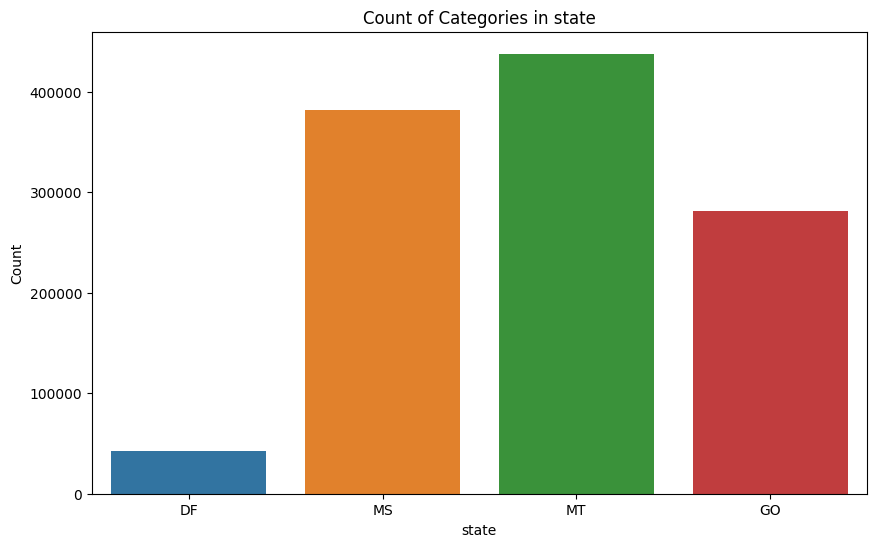

In [ ]:
# Visualize the count of categories in a categorical feature
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df)
plt.title('Count of Categories in state')
plt.xlabel('state')
plt.ylabel('Count')
plt.show()

The generates a count plot, which visualises the distribution of categories within a categorical feature named 'state' in a DataFrame.

2. Distribution of Amount of Precipitation

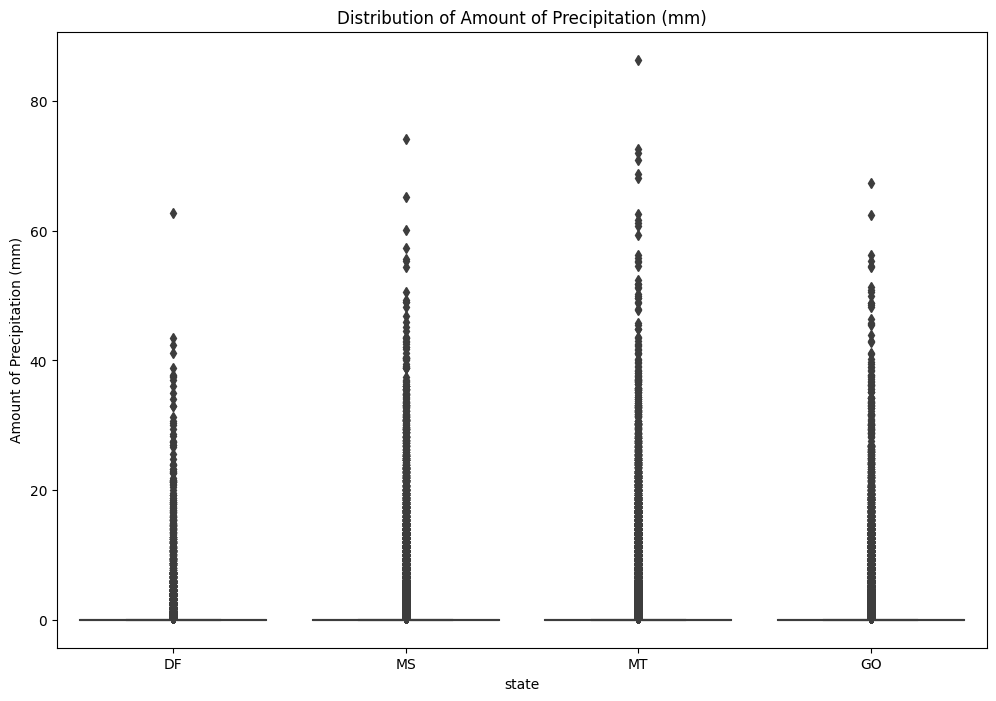

In [ ]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='Amount of Precipitation (mm)', data=df_combined)
plt.title('Distribution of Amount of Precipitation (mm)')
plt.xlabel('state')
plt.ylabel('Amount of Precipitation (mm)')
plt.show()

This generates a box plot that represents the distribution of the 'Amount of Precipitation (mm)' across different States in the dataset.

# Feature Engineering

## Import Required Libraries
Import pandas, matplotlib, seaborn, and necessary modules from scikit-learn for data preprocessing and visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

## Feature Selection

In [ ]:
# Feature Engineering
df_combined['Date'] = pd.to_datetime(df_combined['Date'])
df_combined['Precipitation_Year'] = df_combined['Date'].dt.year
df_combined['Precipitation_Month'] = df_combined['Date'].dt.month

- Convert 'Date' Column to datetime Format
- Create New Features (Year and Month):
  - **df_combined['Precipitation_Year'] = df_combined['Date'].dt.year:** Extracts the year from the 'Date' column and creates a new 'Precipitation_Year' column.
  - **df_combined['Precipitation_Month'] = df_combined['Date'].dt.month:** Extracts the month from the 'Date' column and creates a new 'Precipitation_Month' column.

Display the information of the dataset to get insights of the data structure.

In [ ]:
# Explore the structure of the dataset
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142712 entries, 0 to 1142711
Data columns (total 30 columns):
 #   Column                                                Non-Null Count    Dtype         
---  ------                                                --------------    -----         
 0   index                                                 1142712 non-null  int64         
 1   Date                                                  1142712 non-null  datetime64[ns]
 2   Time                                                  1142712 non-null  object        
 3   Amount of Precipitation (mm)                          1142712 non-null  float64       
 4   Atmospheric Pressure at Station Level (mB)            1142712 non-null  float64       
 5   MAX Air pressure for the last hour (mB)               1142712 non-null  float64       
 6   MIN Air pressure for the last hour (mB)               1142712 non-null  float64       
 7   Solar Radiation (KJ/m2)                               

## Calculate Correlation Matrix

<ipython-input-28-bb5811b92a4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.corr()


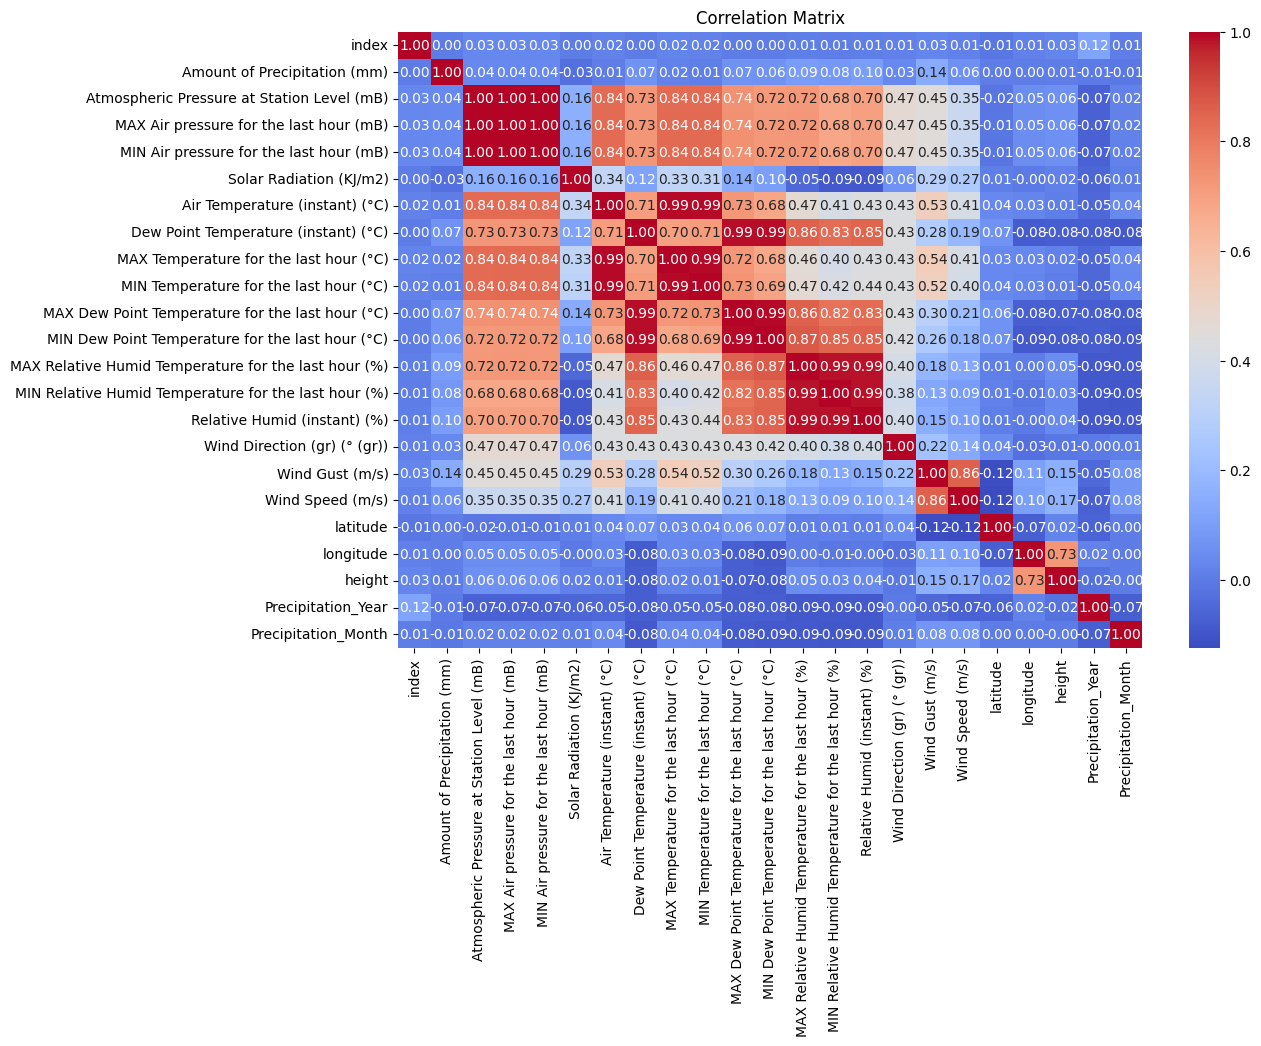

In [ ]:
# Correlation matrix for numerical variables
correlation_matrix = df_combined.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

This step calculates the correlation matrix of numerical variables using **df_combined.corr()** and visualizes it as a heatmap. This heatmap illustrates the pairwise correlation between numerical features in the dataset.

---

# Conclusion


In our exploration of the dataset, we encountered a significant challenge related to its size, surpassing 1GB. Recognizing the potential inefficiencies in handling such large datasets, we determined that implementing a chunking method would be essential. This approach involves breaking the dataset into smaller, more manageable chunks, streamlining the process of reading and analyzing the data. By doing so, we aim to enhance the efficiency and speed of our analytical procedures, ensuring that the dataset's size does not hinder our ability to extract meaningful insights.

Furthermore, our analysis unearthed a noteworthy climatic pattern in the central-west region of Brazil. Specifically, the state of MT emerged as having the highest precipitation levels compared to other states in the region. This meteorological insight is crucial for understanding regional climate dynamics and can have implications for various sectors, including agriculture, water resource management, and infrastructure planning.

To refine and deepen our analysis, we employed feature engineering techniques. This involved creating additional features that go beyond the original variables in the dataset. By strategically introducing new variables, we aimed to capture more nuanced aspects of the data, allowing for a more focused and insightful analysis. This decision to engage in feature engineering was motivated by the desire to uncover hidden patterns and relationships within the data that might not be apparent through traditional Exploratory Data Analysis (EDA) alone.

In summary, our approach involves not only addressing the practical challenges posed by the dataset's size through chunking but also delving into the intricacies of regional precipitation patterns and leveraging feature engineering to extract more nuanced insights from the data. This comprehensive strategy aims to provide a deeper and more targeted understanding of the dataset, ultimately facilitating more informed decision-making in various domains.